In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 


In [2]:
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=True')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [9]:
from sklearn.preprocessing import StandardScaler
Standart = StandardScaler()
X = Standart.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [15]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

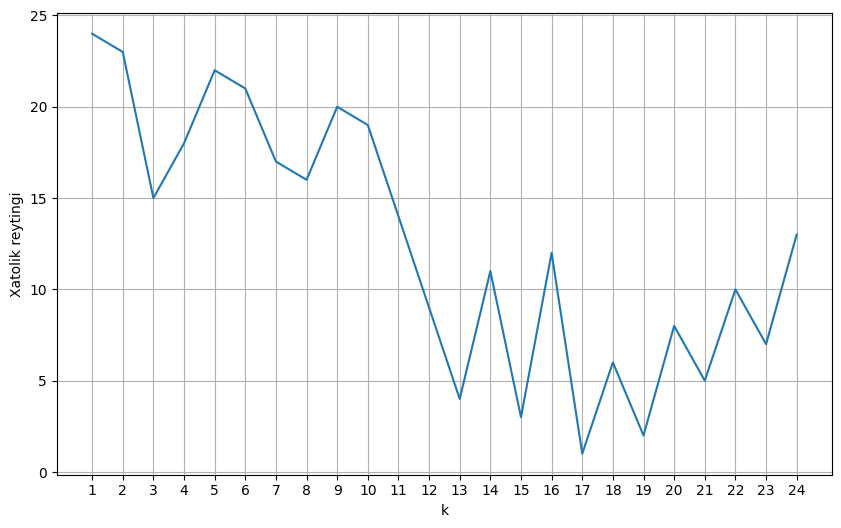

In [22]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [17]:
y_predict = knn.predict(X_test)

In [18]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.4305555555555556

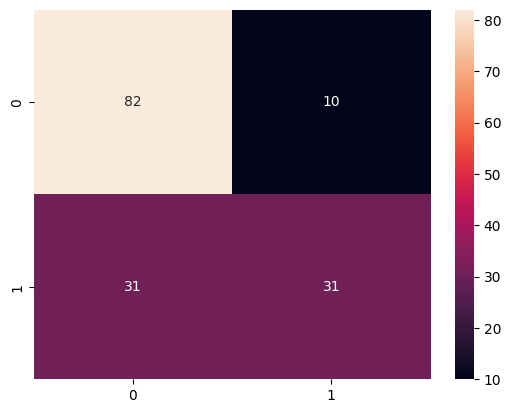

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.7560975609756098
recall=0.5
f1=0.6019417475728155
accuracy=0.7337662337662337


In [21]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768

